# Linear Regression - Bike Sharing - Assignment
## By Munirathinam Duraisamy

## Problem Statement
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.

 - How well those variables describe the bike demands

## Business Goal
I require to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Steps

1) Import Required Libraries

2) Data Overview

3) EDA

    - Data Cleaning 
    - Missing Data Treatment
    - Remove Irrelevant Variables wrt both data and business use cases
    - Outliers Analysis and Treatments
    - Deriving Categorial columns
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
    
4) Model Preparation

    - Training and Test data split
    - Feature Scaling - StandardScaler
    - Feature Engineering & Selection using RFE and Variance Inflation factor
    - Model preparation
    - Residual Analysis
    - Model Evaluation & Assessment
    - Prediction 
    - Conclusion & Analysis

## Importing Libraries

In [8]:
#Impport required libraries for EDA, model buling and evaluations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
#from pandasql import sqldf
import datetime as dt

In [9]:
#Print versions of the libraries used
print('Numpy Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))
print('Matplotlib Version: {}'.format(matplotlib.__version__))
print('Seaborn Version: {}'.format(sns.__version__))
print('The scikit-learn Version: {}.'.format(sklearn.__version__))
print('The statsmodels Version: {}.'.format(statsmodels.__version__))

Numpy Version: 1.20.3
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2
The scikit-learn Version: 0.24.2.
The statsmodels Version: 0.12.2.


## Data Overview

In [10]:
##Loading the bike sharing data into data frame and check the data
bike_sh_data=pd.read_csv("day.csv")
bike_sh_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# checking the data attributes info
bike_sh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# checking the dataframe shape
bike_sh_data.shape

(730, 16)

In [13]:
#Describe the data attributes
bike_sh_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## EDA

In [14]:
#Checking missing values
bike_sh_data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no missing values in any of the attributes

In [15]:
##Checking unique values
bike_sh_data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [16]:
# As we are going to clean the data, taking dataset copy and proceed further
bike_data_new=bike_sh_data

In [17]:
# Drop the duplicate values
bike_data_new.drop_duplicates(subset=None, inplace=True)

In [18]:
#Check the shape after droping duplicate values
print("Old Data Frame Shape: ",bike_sh_data.shape)
print("New Data Frame Shape: ",bike_data_new.shape)

Old Data Frame Shape:  (730, 16)
New Data Frame Shape:  (730, 16)


#### Since the shape remains same in both data frame, there is no duplicate values in the dataset

#### Droping below variables for respective reasons
 1) instant      - As it is unique value and record index , it will not be significant for the analysis <br>
 2) dteday       - This is date variable. We have yr and mnth variable for the analysis. So, this could be a duplicate information<br>
 3) casual  & registered   - As cnt is the target variable and cnt is combination of both these variable, we can drop these



In [19]:
bike_data_new = bike_data_new.drop(columns=['instant','dteday','casual','registered'],axis=1)

#### Categorize the Actual String value

In [20]:
bike_data_new['season'] = bike_data_new['season'].apply(lambda x :'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x==3 else 'winter')))
bike_data_new['weathersit'] = bike_data_new['weathersit'].apply(lambda x :'clear' if x == 1 else ('mist' if x == 2 else ('light_rain' if x==3 else 'heavy_rain')))
bike_data_new['mnth'] = bike_data_new['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_data_new['weekday'] = bike_data_new['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [21]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [23]:
#We will analyze all variables data; Finding value count for all variables
for i in bike_data_new.columns:
    print(bike_data_new[i].value_counts())
    print('-----------------------------------------------')



fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
-----------------------------------------------
0    365
1    365
Name: yr, dtype: int64
-----------------------------------------------
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: mnth, dtype: int64
-----------------------------------------------
0    709
1     21
Name: holiday, dtype: int64
-----------------------------------------------
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64
-----------------------------------------------
1    499
0    231
Name: workingday, dtype: int64
-----------------------------------------------
clear         463
mist          246
light_rain     21
Name: weathersit, dtype: int64
-----------------------------------------------
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.43584

Variable Name: temp


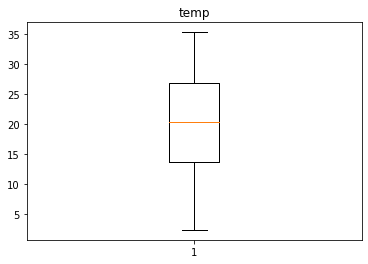

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound []
Variable Name: atemp


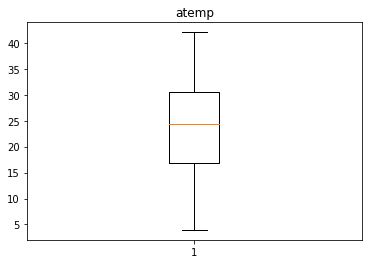

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound []
Variable Name: hum


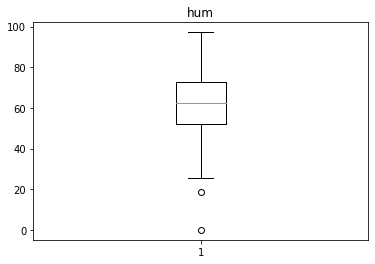

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64
----------------------------------------------------- 

Values below lower bound [18.7917  0.    ]
Values above upper bound []
Variable Name: windspeed


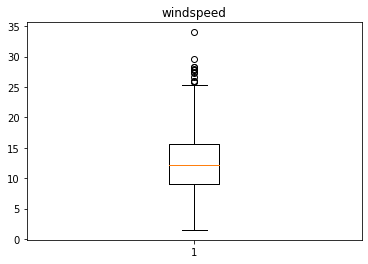

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64
----------------------------------------------------- 

Values below lower bound []
Values above upper bound [27.999836 34.000021 25.833257 26.000489 28.292425 27.833743 27.417204
 28.250014 29.584721 27.7916   25.917007 26.666536 27.292182]


In [24]:
# Continuous variables: temp, atemp, hum, windspeed - check is there any outliers in these data
cnt_var=['temp', 'atemp', 'hum', 'windspeed']
for i  in cnt_var:
    print("Variable Name:",i)
    plt.title(i)
    plt.boxplot(bike_data_new[i])
    plt.show()
    print(bike_data_new[i].describe())
    print("----------------------------------------------------- \n")
    Q3,Q1 = np.percentile(bike_data_new[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    print("Values below lower bound",bike_data_new[i][bike_data_new[i]<=lower_bound].values)
    print("Values above upper bound",bike_data_new[i][bike_data_new[i]>=upper_bound].values)
    

#### Insights
There is no outliers in temp and atemp variables
There are some outliers in hum and windspeed. But, the ratio is very small.Also, the outlier values are not much deviated from the upper bound values. 


## Univariate, Bivariate and Multivariate Analysis

In [25]:
#function to generate hist plot and dist plot to undertand the spread of values for a particular variables
def univ_cont_anlys(cont_var,x_size=6,y_size=6,color_v="g",bin="auto"):
    
    plt.figure(figsize=(x_size,y_size))
    
    plt.hist(bike_data_new[cont_var],color=color_v,bins=bin,edgecolor='blue') #Draw histogram for given variable
    
    plt.title(cont_var)
    
    plt.xlabel(cont_var)
    
    plt.ylabel("Frequency")
    
    plt.show()
    
    sns.distplot(bike_data_new[cont_var],kde=True,color=color_v,bins=bin)
    
    plt.title(cont_var)
    
    plt.title(cont_var)
    
    plt.show()

In [26]:
#Assign the continuous and catg variables list to a variable
cnt_var= ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
ctg_var = ['season', 'mnth', 'weekday', 'weathersit']

Varible Name:  yr


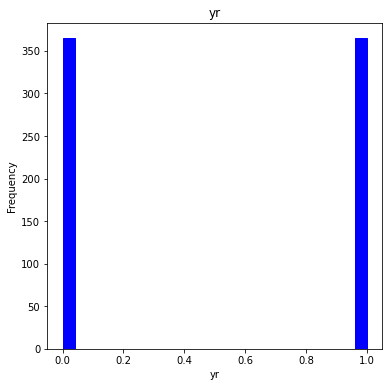

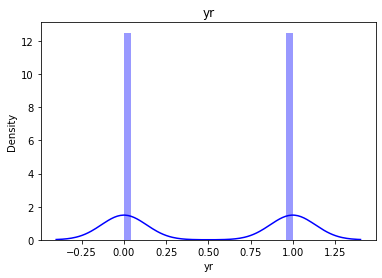

Count of each values:

0    365
1    365
Name: yr, dtype: int64

-------------------------------------------------

Varible Name:  holiday


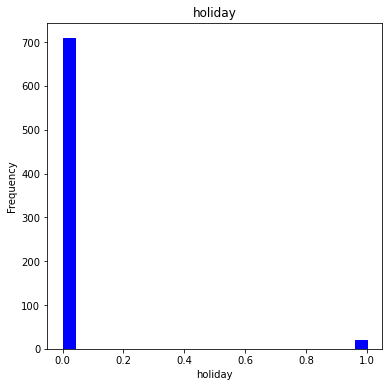

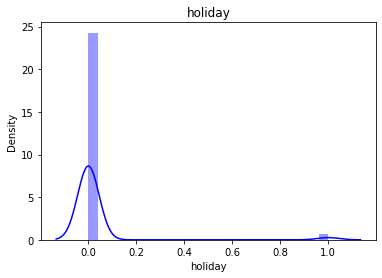

Count of each values:

0    709
1     21
Name: holiday, dtype: int64

-------------------------------------------------

Varible Name:  workingday


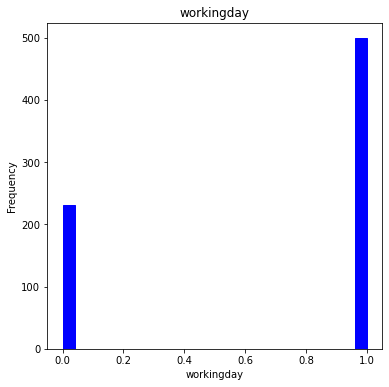

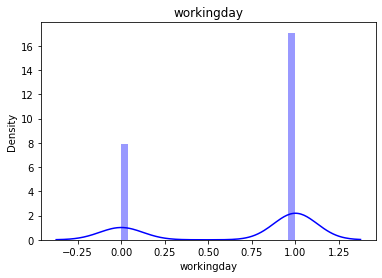

Count of each values:

1    499
0    231
Name: workingday, dtype: int64

-------------------------------------------------

Varible Name:  temp


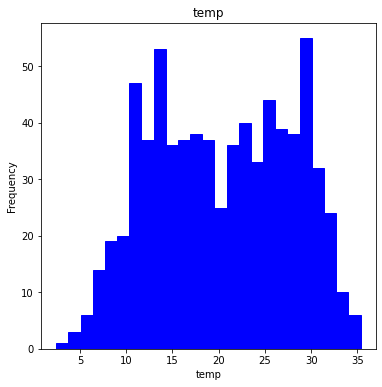

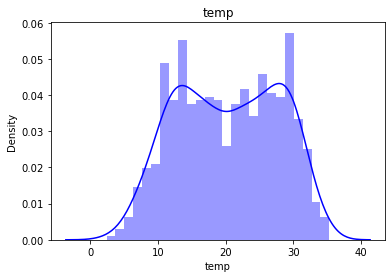

Count of each values:

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

-------------------------------------------------

Varible Name:  atemp


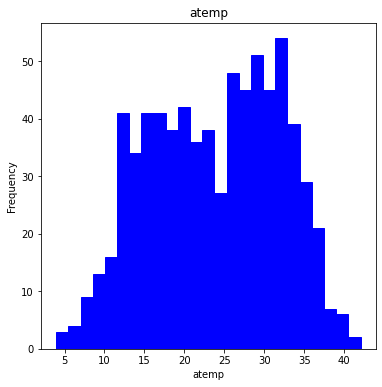

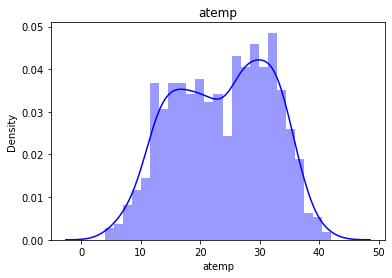

Count of each values:

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

-------------------------------------------------

Varible Name:  hum


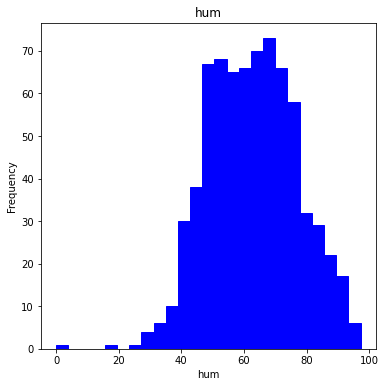

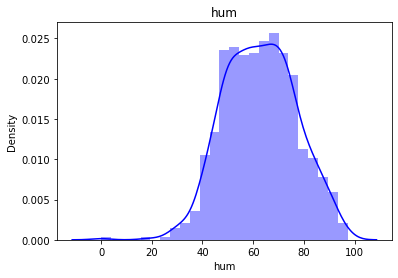

Count of each values:

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

-------------------------------------------------

Varible Name:  windspeed


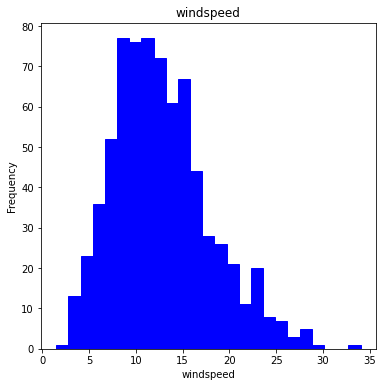

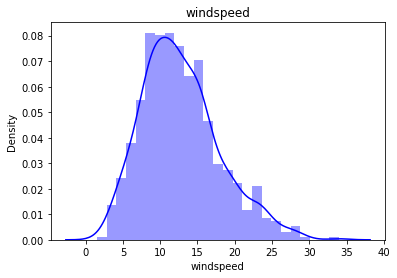

Count of each values:

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

-------------------------------------------------

Varible Name:  cnt


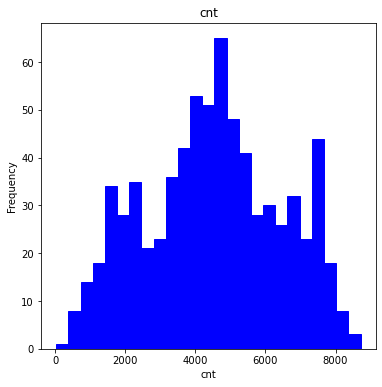

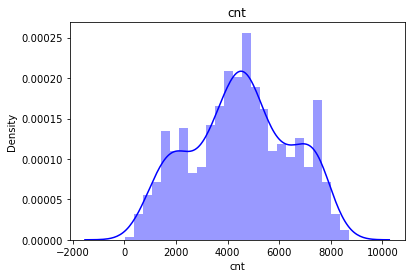

Count of each values:

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

-------------------------------------------------



In [27]:
# loop through all continuous variables and draw hist and dist plots using the function created

for i in cnt_var:
    print("Varible Name: ",i)
    univ_cont_anlys(i,color_v='b',bin=25)
    print("Count of each values:\n")
    print(bike_data_new[i].value_counts())
    
    print("\n-------------------------------------------------\n")

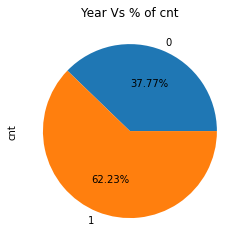

In [28]:
# Ploting pie char to find the % of total rental bykes Vs year
bike_data_new.groupby(['yr'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Year Vs % of cnt")
plt.show()

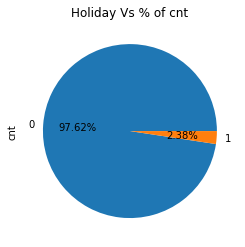

In [29]:
# Ploting pie char to find the % of total rental bykes Vs Holiday
bike_data_new.groupby(['holiday'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Holiday Vs % of cnt")
plt.show()

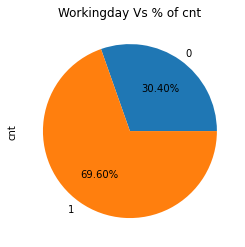

In [30]:
# Ploting pie char to find the % of total rental bykes Vs workingday
bike_data_new.groupby(['workingday'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Workingday Vs % of cnt")
plt.show()

In [31]:
#Bin the temp variable. 
bike_data_new['temp_slab'] = bike_data_new['temp'].apply(lambda x : '>35' if x >35 else ('30-35' if (x > 30 and x <=35) else ('25-30' if (x > 25 and x <=30) else ('20-25' if (x > 20 and x <=25) else ('15-20' if (x > 15 and x <=20) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else '< 5')))))))


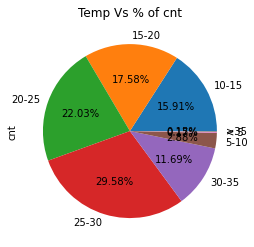

In [32]:
# Ploting bar char to find the % of total rental bykes Vs temp

bike_data_new.groupby(['temp_slab'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Temp Vs % of cnt")
plt.show()


In [33]:
#Bin the actual temp variable. 
bike_data_new['atemp_slab'] = bike_data_new['atemp'].apply(lambda x : '>35' if x >35 else ('30-35' if (x > 30 and x <=35) else ('25-30' if (x > 25 and x <=30) else ('20-25' if (x > 20 and x <=25) else ('15-20' if (x > 15 and x <=20) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else '< 5')))))))


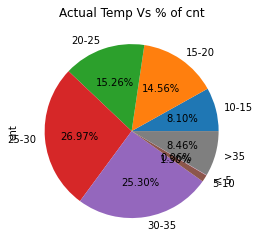

In [34]:
# Ploting bar char to find the % of total rental bykes Vs atemp

bike_data_new.groupby(['atemp_slab'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Actual Temp Vs % of cnt")
plt.show()

In [35]:
#binned humidity values
bike_data_new['hum_slab'] = bike_data_new['hum'].apply(lambda x : '>95' if x >95 else ('75-95' if (x > 75 and x <=95) else ('50-75' if (x > 50 and x <=75) else ('25-50' if (x > 25 and x <=50) else ('5-25' if (x > 5 and x <=25) else '< 5')))))

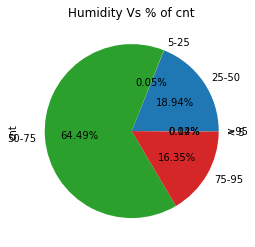

In [36]:
# Ploting bar char to find the % of total rental bykes Vs humidity

bike_data_new.groupby(['hum_slab'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Humidity Vs % of cnt")
plt.show()

In [37]:
#binned wind speed values
bike_data_new['windspeed_slab'] = bike_data_new['windspeed'].apply(lambda x : '>25' if x >25 else ('15-25' if (x > 15 and x <=25) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else ('0-5' if (x > 0 and x <=5) else '< 0')))))


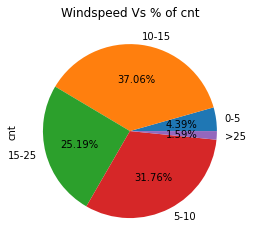

In [38]:
# Ploting bar char to find the % of total rental bykes Vs wind speed

bike_data_new.groupby(['windspeed_slab'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Windspeed Vs % of cnt")
plt.show()

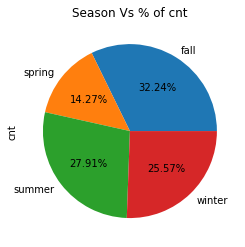

In [39]:
# Ploting pie char to find the % of total rental bykes Vs Season
bike_data_new.groupby(['season'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Season Vs % of cnt")
plt.show()

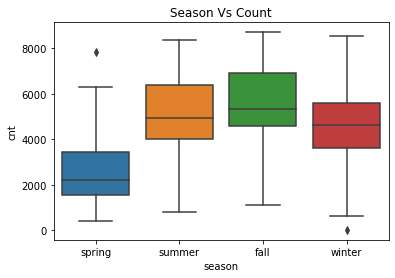

In [40]:
sns.boxplot(x = 'season', y = 'cnt', data = bike_data_new)
plt.title("Season Vs Count")
plt.show()

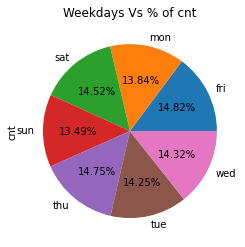

In [41]:
# Ploting pie char to find the % of total rental bykes Vs weekday
bike_data_new.groupby(['weekday'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Weekdays Vs % of cnt")
plt.show()

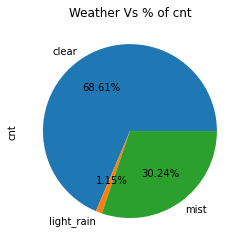

In [42]:
# Ploting pie char to find the % of total rental bykes Vs Weather
bike_data_new.groupby(['weathersit'])['cnt'].agg('sum').plot.pie(autopct='%1.2f%%')
plt.title("Weather Vs % of cnt")
plt.show()

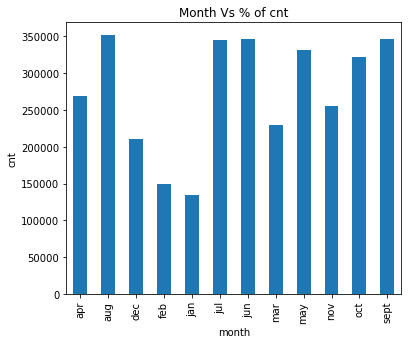

mnth
aug     351194
jun     346342
sept    345991
jul     344948
may     331686
oct     322352
apr     269094
nov     254831
mar     228920
dec     211036
feb     149518
jan     134933
Name: cnt, dtype: int64

In [43]:
# Ploting bar char to plot the braph between total rental bykes Vs month
month_cnt = bike_data_new.groupby(['mnth'])['cnt'].sum()
month_cnt.plot(kind='bar', title='Month Vs % of cnt', ylabel='cnt', xlabel='month',  figsize=(6, 5))
plt.show()

month_cnt.sort_values(ascending=False)


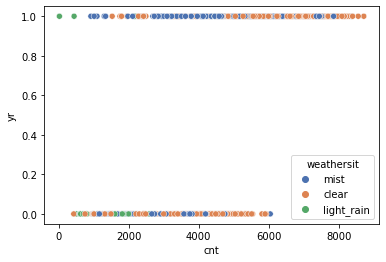

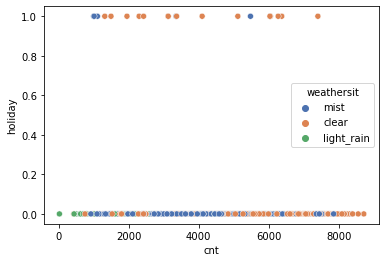

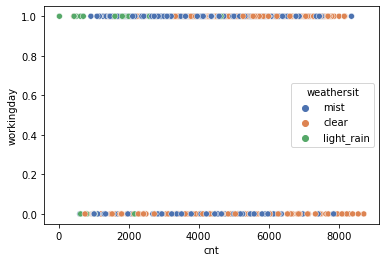

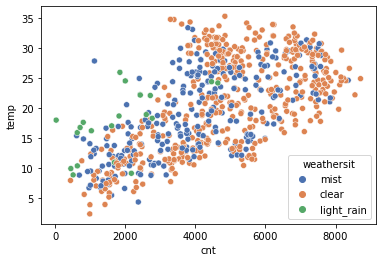

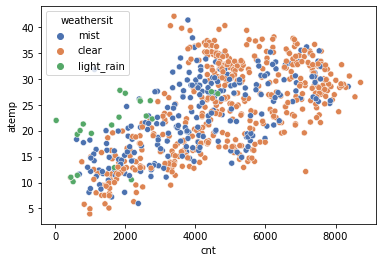

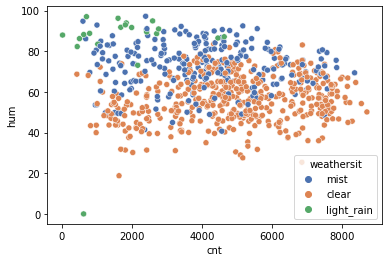

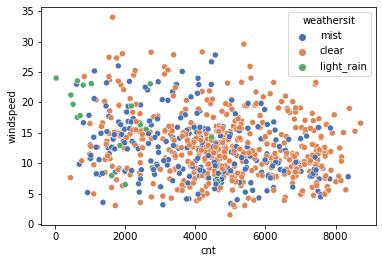

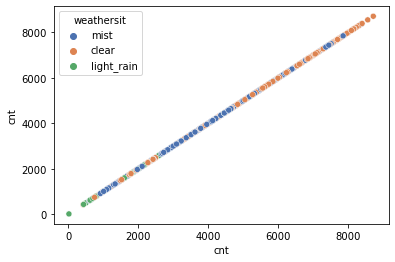

In [44]:
#Plot the scatter plot for cnt varialbe, weathersit against all the continuous variables
for i in cnt_var :
    sns.scatterplot(bike_data_new['cnt'],bike_data_new[i],hue=bike_data_new['weathersit'],data=bike_data_new,palette="deep")
    plt.show()

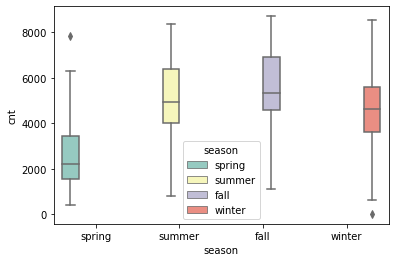

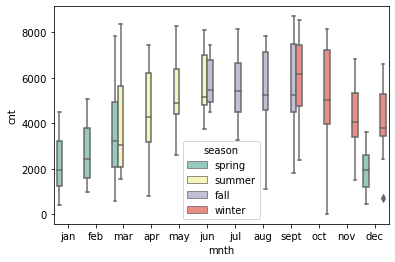

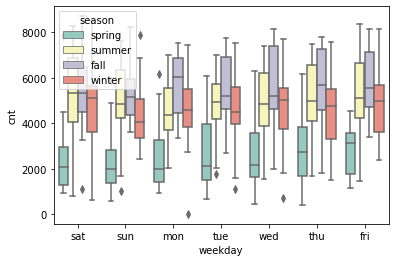

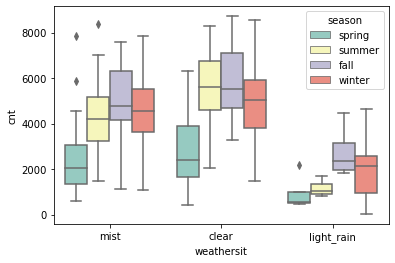

In [45]:
#Plot the box plot for cnt varialbe, season against all the categorical variables
for i in ctg_var :
    sns.boxplot(bike_data_new[i],bike_data_new['cnt'],hue=bike_data_new['season'],data=bike_data_new,palette="Set3")
    plt.show()

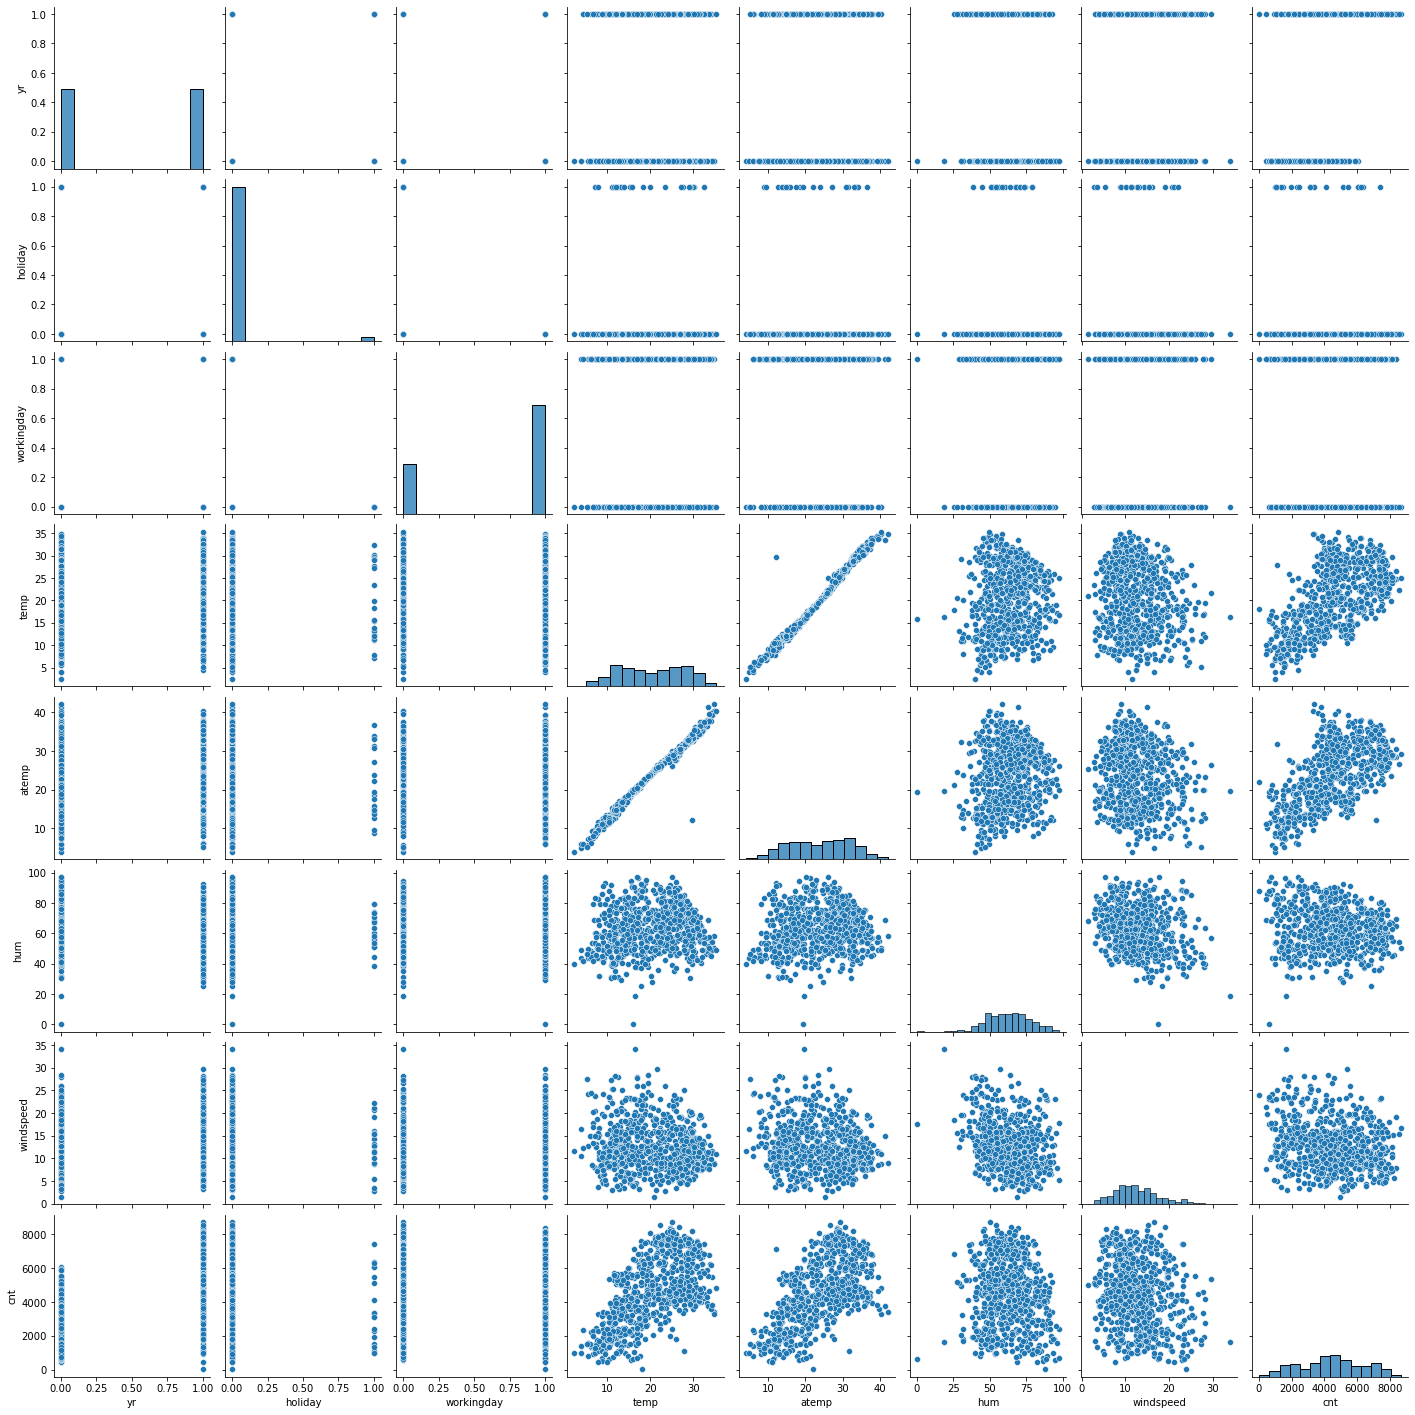

In [46]:
#Plot the pair plot for all the continuous variables to understand the relationships
sns.pairplot(bike_data_new)

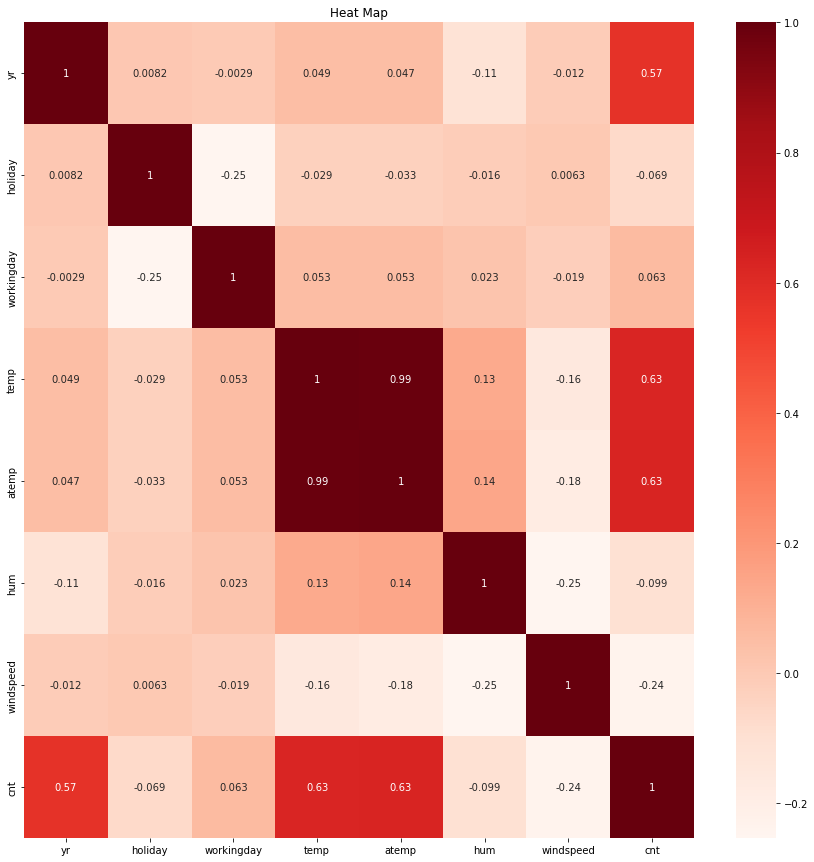

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [47]:


#plot Heat map on all numerical variables for correlation analysis
plt.figure(figsize=(15,15))
sns.heatmap(bike_data_new.corr(),cmap="Reds",annot=True)
plt.title("Heat Map")
plt.show()
#Print the correlation factors for all numerical varaibles
bike_data_new.corr()



### Insights of EDA
- 62.33 % of total Bike hired in year 2019
- Around 97.62% of bike hiring is on non holidays 
- Around 69.6% of bike hiring is on working days 
- Around 29.58% of bike hiring happened in the temp between 25-30 
- Around 26.97% of bike hiring happened in the actual temp between 25-30 
- There is a vast different in actual temperature and temperature variable . Especially, in slab of 30-35, actual is of 25.3% whereas temp is of 11.69% 
- Around 64.5%of bike hiring happened in the humidity between 50 and 75 
- Around 37%of bike hiring happened in the wind speed between 10 and 15. Also, good % of bike hiring happened for the wind speed is between 5 to 25 
- Highest number of bike hiring is in fall and then summer seasons 
- Around 69% of total bike hiring is in clear / partial cloudy weather and then 30.24% in the mist weather. If it’s raining, the bike hiring is almost not happening. 
- More number of bike hiring happened between May and Oct (between ~32K & ~35K). In which Aug month has high.
- Cnt variable is correlated with temp (high corr), atemp(high corr), yr(high corr), season, mnth, windspeed. Only wind speed is negative correlation 
- There is a linear relationship between cnt and temp; cnt and atemp varaibles 
- temp variable have high correlation with atemp variable 
- mnth & season have good correlation





In [48]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_slab,atemp_slab,hum_slab,windspeed_slab
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,10-15,15-20,75-95,10-15
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,10-15,15-20,50-75,15-25
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,5-10,5-10,25-50,15-25
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,5-10,10-15,50-75,10-15
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,5-10,10-15,25-50,10-15


In [49]:
# As binning columns are not requried for further model creation, droping the same
bike_data_new=bike_data_new.drop(columns=['temp_slab','atemp_slab','hum_slab','windspeed_slab'], axis=1)

In [50]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
#Creating dummies - categorical encoding
bike_data_new = pd.get_dummies(data=bike_data_new,columns=['mnth'],drop_first=True)
bike_data_new = pd.get_dummies(data=bike_data_new,columns=['weekday'],drop_first=True)
bike_data_new = pd.get_dummies(data=bike_data_new,columns=['season'],drop_first=True)
bike_data_new = pd.get_dummies(data=bike_data_new,columns=['weathersit'],drop_first=True)

In [52]:
bike_data_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

##### created (n-1) values of columns for each attributes. It also dropped the orginal variable on which dummies created.

In [53]:
#chceking the data for all columns
bike_data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,1,0,0,0,0


In [54]:
# Split the train(70%) and test(30%) data set
df_train,df_test = train_test_split(bike_data_new,train_size=.7,test_size=.3,random_state = 42)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [55]:
#Scaling the values for below numerical values. We will use MinMax scaler as its commonly used and take care of outliers if any
scaler = MinMaxScaler()
num_var=['temp', 'atemp', 'hum', 'windspeed','cnt']
#Fit and transfor training set
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,0,1,0,0,0,0,1,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,0,0,0,0,1,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,...,0,0,0,0,0,0,1,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,...,0,0,0,1,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,1,0,0,1,0,1


In [56]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.074510,0.074510,...,0.150980,0.152941,0.147059,0.131373,0.139216,0.231373,0.256863,0.250980,0.029412,0.345098
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.262857,0.262857,...,0.358381,0.360284,0.354512,0.338139,0.346511,0.422124,0.437332,0.434003,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


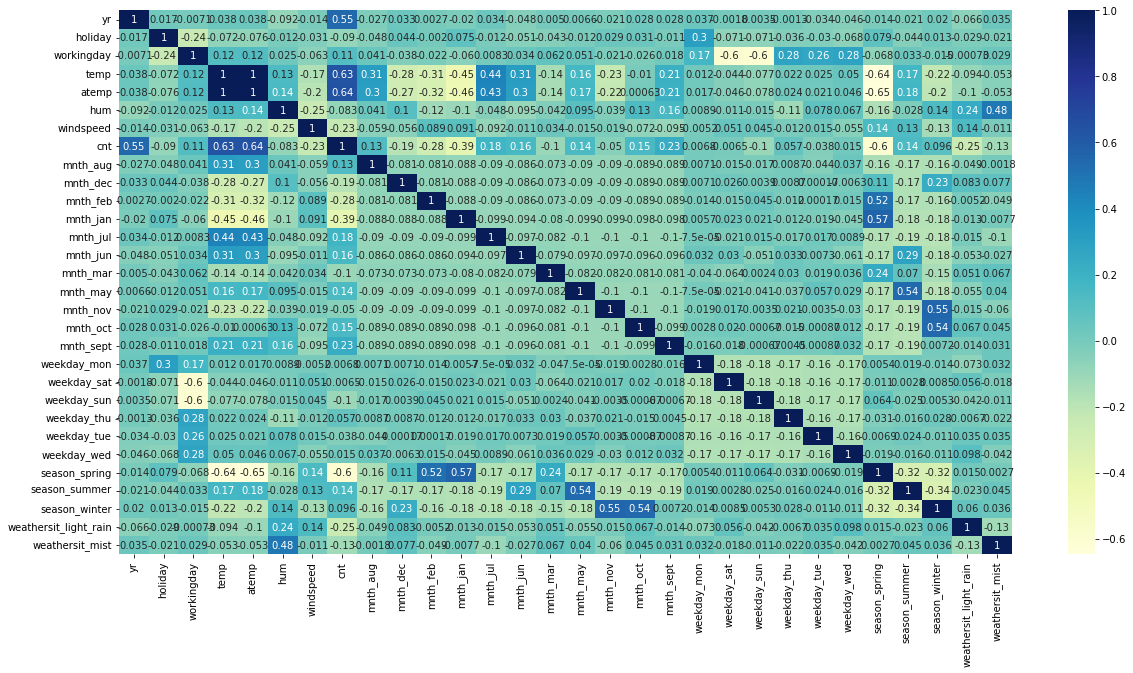

In [57]:
#check heat map for correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Insights
With this above map, we can find the variables that are correlated with target varaibles.Ex:Temp, atemp,yr, season_sprint(negative corr)

We also can understand what are the variables that are multicollinear in nature.Ex: Temp and Atemp

## Building Linear Model

#### We are going to follow automated variable selection using RFE approach and manual variable elimination using VIF and P-values

In [58]:
#setup X and Y sets for model building;  Y -Target varaible 'cnt' and X-rest all variables
y_train =df_train.pop('cnt')
x_train = df_train

In [59]:
# check the coluns list for x
x_train.columns 

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

In [60]:
# create model using sklearn linear model
lm = LinearRegression()
lm.fit(x_train, y_train)
# use RFE method to select 15 features 
rfe = RFE(lm, 15)             
rfe = rfe.fit(x_train, y_train)

In [61]:
# create list with rfe rank and rfe support model 
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 7),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 4),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 11),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', False, 14),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 12),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', False, 2)]

In [62]:
# list of columns which have rfe support

rfe_support_list = x_train.columns[rfe.support_]

rfe_support_list

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mnth_dec', 'mnth_jul', 'mnth_nov', 'weekday_sat', 'weekday_sun',
       'season_spring', 'season_winter', 'weathersit_light_rain'],
      dtype='object')

In [63]:
# list of columns which have rfe support is False i.e not useful

x_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'season_summer', 'weathersit_mist'],
      dtype='object')

## Building Model using Statsmodel

In [64]:
# Creating a function to return the OLS model

def ols_model(df_ytrain,df_xtrain_rfe):
    # Input parameter will be the training dataset and output will be the ols model
    # we need to add constant to the xtrain and before fitting to OLS

    df_xtrain_sm = sm.add_constant(df_xtrain_rfe)
    lr = sm.OLS(df_ytrain,df_xtrain_sm)
    lr_model=lr.fit()    
    return lr_model,df_xtrain_sm

# Creating a function to return the Varince Inflation Factor 

def variance_inflation(df_xtrain):
    # Input parameter will be the training dataset and the output will be the vif data frame

    vif = pd.DataFrame()
    vif['features'] = df_xtrain.columns
    vif['VIF'] = [variance_inflation_factor(df_xtrain.values,i) for i in range(df_xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif


##### Using above functions create multiple models and based on below elimination conditions, we can manually eliminate the variables to get better model

High pvalue , high VIF - remove first

High pvalue , low VIF - remove second

Low  pvalue , high VIF - removed third


In [65]:
#Consider the EDA analysis and RFE support variables, we will finalize the list instead of considering only the variables choosed by RFE
Final_Feature_list = ['yr', 'holiday', 'workingday', 'temp','atemp', 
                      'mnth_aug', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'season_spring', 'season_winter', 'weathersit_mist',
       'weathersit_light_rain','windspeed','hum'] 
x_train_rfe=x_train[Final_Feature_list]
x_train_rfe

,yr,holiday,workingday,temp,atemp,mnth_aug,mnth_dec,mnth_jul,mnth_nov,mnth_sept,weekday_sat,weekday_sun,season_spring,season_winter,weathersit_mist,weathersit_light_rain,windspeed,hum
683,1,0,1,0.327133,0.322150,0,0,0,1,0,0,0,0,1,1,0,0.327101,0.639330
645,1,1,0,0.403972,0.404998,0,0,0,0,0,0,0,0,1,1,0,0.419004,0.731215
163,0,0,1,0.717562,0.685963,0,0,0,0,0,0,0,0,0,0,0,0.708724,0.509660
360,0,0,1,0.331287,0.326273,0,1,0,0,0,0,0,1,0,1,0,0.415925,0.785745
640,1,0,1,0.745598,0.682653,0,0,0,0,0,0,0,0,1,1,0,0.110593,0.817947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1,0,0,0.359323,0.367719,0,1,0,0,0,0,1,0,1,1,0,0.255447,0.848432
71,0,0,0,0.405237,0.395131,0,0,0,0,0,0,1,1,0,0,0,0.621696,0.543468
106,0,0,0,0.495350,0.481247,0,0,0,0,0,0,1,0,0,0,0,0.704080,0.494203
270,0,0,1,0.717562,0.651183,0,0,0,0,1,0,0,0,1,1,0,0.316186,0.874624


### Model-1
This model is with all the above choosed features

In [66]:
#Calling the functions we created above to create model on new features & compute VIF for all variables, print model summary and VIF results
model_1,df_xtrain_sm1 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     155.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.91e-185
Time:                        13:07:08   Log-Likelihood:                 489.96
No. Observations:                 510   AIC:                            -943.9
Df Residuals:                     492   BIC:                            -867.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

#### Insights
Here we can see temp has both high pvalue and high vif and atemp has low pvalue and high vif

As temp and atemp variables are highly correlated to each other we can drop either one. 

we will drop atemp as actual temp cannot be forecasted before.

### Model-2

In [67]:
x_train_rfe = x_train_rfe.drop(columns=["atemp"],axis=1)

In [68]:
#rebuild the model with new data set and check VIF factors
model_2,df_xtrain_sm2 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_2.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.13e-186
Time:                        13:07:08   Log-Likelihood:                 488.90
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     493   BIC:                            -871.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

#### Insights
Now we can see that VIF and p-value for temp changed drastically.

Now, holiday has high p-value and drop the same.

### Model-3

In [69]:
x_train_rfe = x_train_rfe.drop(columns=["holiday"],axis=1)

In [70]:
#rebuild the model with new data set and check VIF factors
model_3,df_xtrain_sm3 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_3.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          6.13e-186
Time:                        13:07:08   Log-Likelihood:                 488.90
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     493   BIC:                            -871.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

#### Insights
Droping weekday_sun as it has high p-value than others

### Model-4

In [71]:
x_train_rfe = x_train_rfe.drop(columns=["weekday_sun"],axis=1)

In [72]:
#rebuild the model with new data set and check VIF factors
model_4,df_xtrain_sm4 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_4.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.68e-186
Time:                        13:07:08   Log-Likelihood:                 487.55
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     494   BIC:                            -875.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

#### Insight
Droping hum as it has high VIF value

### Model-5

In [73]:
x_train_rfe = x_train_rfe.drop(columns=["hum"],axis=1)

In [74]:
#rebuild the model with new data set and check VIF factors
model_5,df_xtrain_sm5 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_5.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.92e-184
Time:                        13:07:08   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -929.0
Df Residuals:                     495   BIC:                            -865.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

#### Insight
Droping mnth_aug as it has high p-value

### Model-6

In [75]:
x_train_rfe = x_train_rfe.drop(columns=["mnth_aug"],axis=1)

In [76]:
#rebuild the model with new data set and check VIF factors
model_6,df_xtrain_sm6 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_6.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.53e-184
Time:                        13:07:08   Log-Likelihood:                 477.40
No. Observations:                 510   AIC:                            -926.8
Df Residuals:                     496   BIC:                            -867.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

<AxesSubplot:>

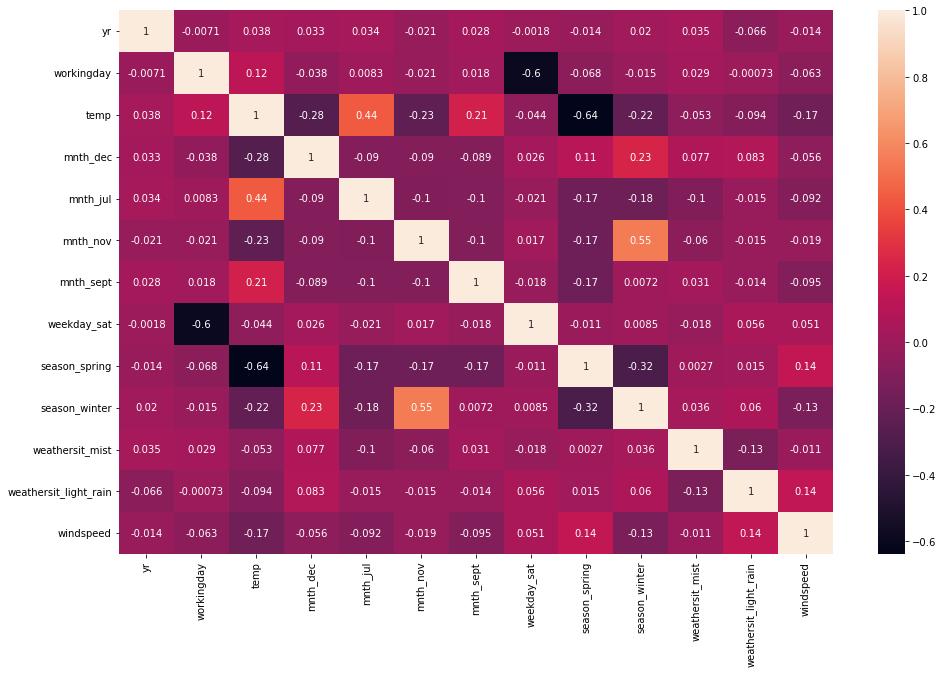

In [77]:
#Lets find the correlation between the variables using heatmap and can be used to remove features
plt.figure(figsize=(16,10))

sns.heatmap(x_train_rfe.corr(),annot=True)

#### Insights
We can see high correlation between season_winter and mnth_nov; weekday_sat and workingday(negative)

Hence droping mnth_nov & weekday_sat

### Model-7

In [78]:
x_train_rfe = x_train_rfe.drop(columns=["mnth_nov","weekday_sat"],axis=1)

In [79]:
#rebuild the model with new data set and check VIF factors
model_7,df_xtrain_sm7 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_7.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.97e-180
Time:                        13:07:09   Log-Likelihood:                 461.14
No. Observations:                 510   AIC:                            -898.3
Df Residuals:                     498   BIC:                            -847.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

#### Insight
Remove Workdays as it has high p-value

### Model-8

In [80]:

x_train_rfe = x_train_rfe.drop(columns=["workingday"],axis=1)

In [81]:
#rebuild the model with new data set and check VIF factors
model_8,df_xtrain_sm8 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_8.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.97e-180
Time:                        13:07:09   Log-Likelihood:                 457.71
No. Observations:                 510   AIC:                            -893.4
Df Residuals:                     499   BIC:                            -846.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

#### Insights
Remove mnth_dec due to high p-value

### Model-9 

In [82]:
x_train_rfe = x_train_rfe.drop(columns=["mnth_dec"],axis=1)

In [83]:
#rebuild the model with new data set and check VIF factors
model_9,df_xtrain_sm9 = ols_model(y_train,x_train_rfe)
vif = variance_inflation(x_train_rfe)
print(model_9.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.16e-179
Time:                        13:07:09   Log-Likelihood:                 453.94
No. Observations:                 510   AIC:                            -887.9
Df Residuals:                     500   BIC:                            -845.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

### Insights
We can finalize Model-9 because of below reasons.
 - It has significant p-vlaue for all the variables 
 - Very low multicollinearity
 - Good R-square value of around 82%
 - F-stat is 251.7 (high) and prob(F-stat) is 2.16e-179 (low). Hence this model is significant

### Final Model descided is Model-9

##### Equation best fitted surface for Model-9 is
cnt=0.2147+ yr(0.2416)+temp (0.45960) -mnth_jul(0.0647) +mnth_sept(0.0528) -season_spring(0.1474) +season_winter (0.0495) -weathersit_mist(0.0794) - weathersit_light_rain(0.2610) - windspeed(0.0914)

## Model Evaluation and Assessment

### Residual Analysis

Text(0.5, 1.0, 'Error Terms Distributions')

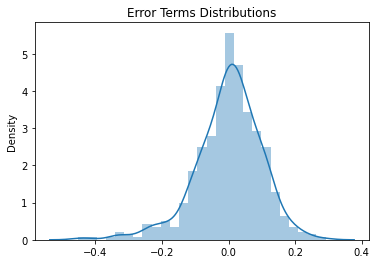

In [84]:
#Perform residual analysis and plot the error terms distributions
y_train_pred = model_9.predict(df_xtrain_sm9)
res=y_train - y_train_pred
sns.distplot(res)
plt.title("Error Terms Distributions")

Text(0.5, 1.0, 'Residual Plot on Train Data')

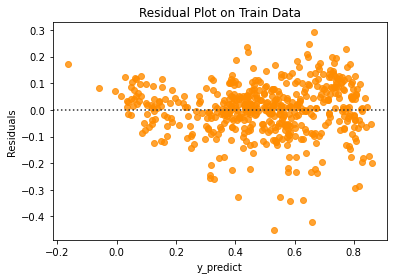

In [85]:
#Plot to check residuals independent of each other
sns.residplot(y_train_pred,res,color='darkorange')
plt.xlabel("y_predict")
plt.ylabel("Residuals")
plt.title("Residual Plot on Train Data")

Text(0.5, 1.0, 'Q-Q plot Training Data')

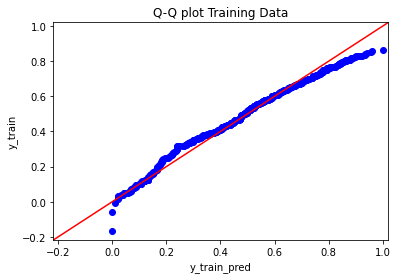

In [86]:
#Q-Q plot → quantile-quantile plot

fig = sm.qqplot_2samples(y_train_pred,y_train,line="45")
plt.xlabel("y_train_pred")
plt.ylabel("y_train")
plt.title("Q-Q plot Training Data")

#### Insight

The distribution of error terms approximately centered around 0 ie Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

From the above residual plot, we could infer that the residuals didn’t form any pattern. So, the residuals are independent of each other.

The residuals have constant variance. Variance doesn’t seem to increase/decrease constantly with the y_predict value.

Residuals are normally distributed as the Q-Q plot of residuals will be a straight line. Points are very close to straight line of 45 degree

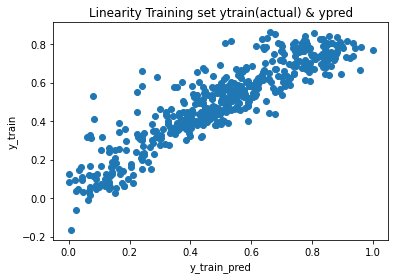

In [87]:
#  scatter plot to understand the spread for linearity assumption test
plt.scatter(y_train,y_train_pred)
plt.ylabel("y_train")
plt.xlabel("y_train_pred")
plt.title("Linearity Training set ytrain(actual) & ypred")
plt.show()

### R-squared value on Training Data Set

In [88]:
#Print R-squared Value on training set 
round(r2_score(y_train,y_train_pred),4)

0.8192

##### We can explain around 82% of variance using the choosed model

## Predictions on Test Data

In [89]:
# apply scaling on test data set
num_var=['temp', 'atemp', 'hum', 'windspeed','cnt']
# as it is test dataset use only transform operation
df_test[num_var] = scaler.transform(df_test[num_var])


In [90]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,0,...,1,0,0,0,0,0,1,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,0,...,0,1,0,0,0,0,1,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,0,1,0,0,0,0,0,1,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,0,1,...,0,0,1,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,0,...,0,0,1,0,0,0,1,0,0,0


In [91]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_light_rain,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.109589,0.109589,...,0.127854,0.123288,0.132420,0.168950,0.141553,0.283105,0.237443,0.228311,0.027397,0.315068
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.313092,0.313092,...,0.334692,0.329520,0.339723,0.375566,0.349389,0.451539,0.426491,0.420705,0.163612,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#dividing x and y test set
y_test = df_test.pop('cnt')
x_test = df_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   mnth_aug               219 non-null    uint8  
 8   mnth_dec               219 non-null    uint8  
 9   mnth_feb               219 non-null    uint8  
 10  mnth_jan               219 non-null    uint8  
 11  mnth_jul               219 non-null    uint8  
 12  mnth_jun               219 non-null    uint8  
 13  mnth_mar               219 non-null    uint8  
 14  mnth_may               219 non-null    uint8  
 15  mnth

In [93]:
#print the train data columns used for final model
x_train_rfe.columns

Index(['yr', 'temp', 'mnth_jul', 'mnth_sept', 'season_spring', 'season_winter',
       'weathersit_mist', 'weathersit_light_rain', 'windspeed'],
      dtype='object')

In [94]:
# set x_test only with the features used in the train set
mod_col=x_train_rfe.columns
x_test=x_test[mod_col]

In [95]:
# Adding constant variable to test dataset
x_test_lm = sm.add_constant(x_test)
x_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   temp                   219 non-null    float64
 3   mnth_jul               219 non-null    uint8  
 4   mnth_sept              219 non-null    uint8  
 5   season_spring          219 non-null    uint8  
 6   season_winter          219 non-null    uint8  
 7   weathersit_mist        219 non-null    uint8  
 8   weathersit_light_rain  219 non-null    uint8  
 9   windspeed              219 non-null    float64
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [96]:
#Predit using final model Model-9
y_test_pred = model_9.predict(x_test_lm)

## Model Evaluation and Assessment on Test Data

Text(0.5, 1.0, 'Error Terms Distributions on Test Data')

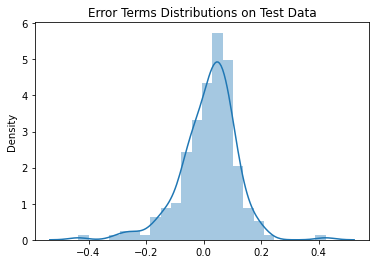

In [97]:
#Perform residula analysis and plot the residual distributions

test_res=y_test - y_test_pred
sns.distplot(test_res)
plt.title("Error Terms Distributions on Test Data")

Text(0.5, 1.0, 'Q-Q Plot on Test Data')

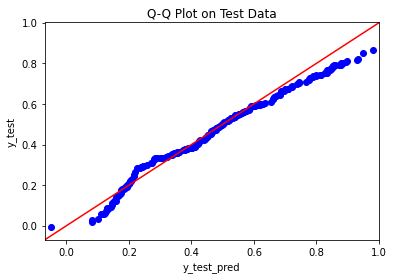

In [98]:
#Q-Q plot → quantile-quantile plot

fig = sm.qqplot_2samples(y_test_pred,y_test,line="45")
plt.xlabel("y_test_pred")
plt.ylabel("y_test")
plt.title("Q-Q Plot on Test Data")

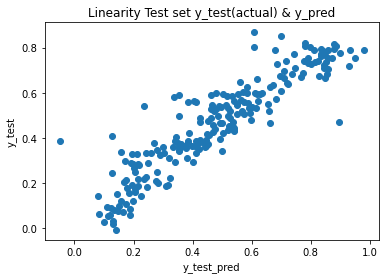

In [99]:
#  scatter plot to understand the spread for linearity assumption test
plt.scatter(y_test,y_test_pred)
plt.ylabel("y_test")
plt.xlabel("y_test_pred")
plt.title("Linearity Test set y_test(actual) & y_pred")
plt.show()

In [100]:
# Find R-square value
r2_score(y_test,y_test_pred)

0.8215672800759489

#### Insights of Results
The model evaluations of both test and train data is almost very similar

R-square value for training is 81.9% for test is 82.15%. This is very close.

Hence the model is well generalized with test data and the model is significant


## Final Model Analysis

- Year: With 2 years data, we can say a unit increase in year variable, the bike hire increases by 0.2416 units
- Temperature: A unit crease in temperature, bike hire increases by 0.45960 units
- Months: In the month of September, bike hire increases by 0.0528 units whereas in Jul, bike hire decreases by 0.0647 units
- Season: In winter season, bike hire increases by 0.0495 units whereas in spring season, bike hire decreases by 0.1474 units
- Weathersit: In weathersit-2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), the bike hire decreases by 0.0794 units. In weathersit-3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), the bike hire decreases by 0.2610 units
- Wind Speed: For a unit increase in wind speed, bike hire decreases by 0.0914 units

##### Equation best fitted surface for the final model Model-9 is
cnt=0.2147+ yr(0.2416)+temp (0.45960) -mnth_jul(0.0647) +mnth_sept(0.0528) -season_spring(0.1474) +season_winter (0.0495) -weathersit_mist(0.0794) - weathersit_light_rain(0.2610) - windspeed(0.0914)

### Significant Features
Below are the significant features considering both model analysis and EDA

    -Year
    -Temperature
    -Month-Aug,Sep,Jul
    -Weathersit_mist
    -Season- Spring and Winter
    -Wind Speed
    -Humidity
    -Holiday
    -Workingday
    

# Conclusion
With the given data set, created a model to predict the demand for bike sharing. I also performed EDA to understand each variable's significance and its correlation with other variables. Finally, we provided model analysis results and also listed the significant variables used for demand predictions.